In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Load your elephant deaths data
df = pd.read_csv(r'D:\UOP\4th year\Research\EDA\Data\cancat.csv')

# Load Sri Lankan district boundaries
districts = gpd.read_file(r'D:\UOP\4th year\Research\District_geo.json')

In [65]:
df.head()

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Kataragama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile


In [66]:
df[df['District']=='Unknown']

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
30,31,North Western,Unknown,Unknown,2010-03-08,Poisned,Male,25-30,Subadults and adults
41,42,North Western,Unknown,Unknown,2010-03-21,Accident,Female,15,Subadults and adults


In [67]:
districts.head(2)

,ADM2_EN,ADM2_SI,ADM2_TA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1SI,ADM2ALT2SI,ADM2ALT1TA,...,ADM0_EN,ADM0_SI,ADM0_TA,ADM0_PCODE,Shape_Leng,Shape_Area,date,validOn,validTo,geometry
0,[unknown],[unknown],[unknoபுத்தளம் மாவட்ட,LK60,,,,,,,...,Sri Lanka,ශ්‍රී ලංකා,இலங்கை,LK,0.286741,0.002137,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((79.82493 7.78566, 79.82341 7.78844, ..."
1,Ampara,අම්පාර දිස්ත්‍රික,அம்பாறை மாவட்டம்,LK52,,,,,,,...,Sri Lanka,ශ්‍රී ලංකා,இலங்கை,LK,5.397133,0.366562,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((81.75144 7.45764, 81.74739 7.45469, ..."


In [68]:
# Rename the district column to 'District'
districts.rename(columns={'ADM2_EN': 'District'}, inplace=True)

In [69]:
# Remove the 'unknown' district
districts = districts[districts['District'] != '[unknown]']

In [70]:
# Group by 'District' and count the number of elephant deaths in each district
elephant_deaths_by_district = df['District'].value_counts().reset_index()
elephant_deaths_by_district.columns = ['District', 'ElephantDeaths']

In [76]:
elephant_deaths_by_district

,District,ElephantDeaths
0,Anuradhapura,281
1,Polonnaruwa,279
2,Ampara,258
3,Trincomalee,217
4,Monaragala,197
5,Kurunegala,99
6,Hambantota,91
7,Batticaloa,91
8,Puttalam,81
9,Ratnapura,67


In [71]:
# Merge the data with district boundaries data
merged_data = districts.merge(elephant_deaths_by_district, on='District', how='left')

In [72]:
merged_data.head(2)

,District,ADM2_SI,ADM2_TA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1SI,ADM2ALT2SI,ADM2ALT1TA,...,ADM0_SI,ADM0_TA,ADM0_PCODE,Shape_Leng,Shape_Area,date,validOn,validTo,geometry,ElephantDeaths
0,Ampara,අම්පාර දිස්ත්‍රික,அம்பாறை மாவட்டம்,LK52,,,,,,,...,ශ්‍රී ලංකා,இலங்கை,LK,5.397133,0.366562,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((81.75144 7.45764, 81.74739 7.45469, ...",258.0
1,Anuradhapura,අනුරාධපුර දිස්ත්‍,அனுராதபுரம் மாவட்,LK71,,,,,,,...,ශ්‍රී ලංකා,இலங்கை,LK,4.539544,0.592676,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((80.93922 8.34202, 80.93707 8.34614, ...",281.0


In [73]:
# Fill NaN values with 0 for districts with no recorded elephant deaths
merged_data['ElephantDeaths'].fillna(0, inplace=True)

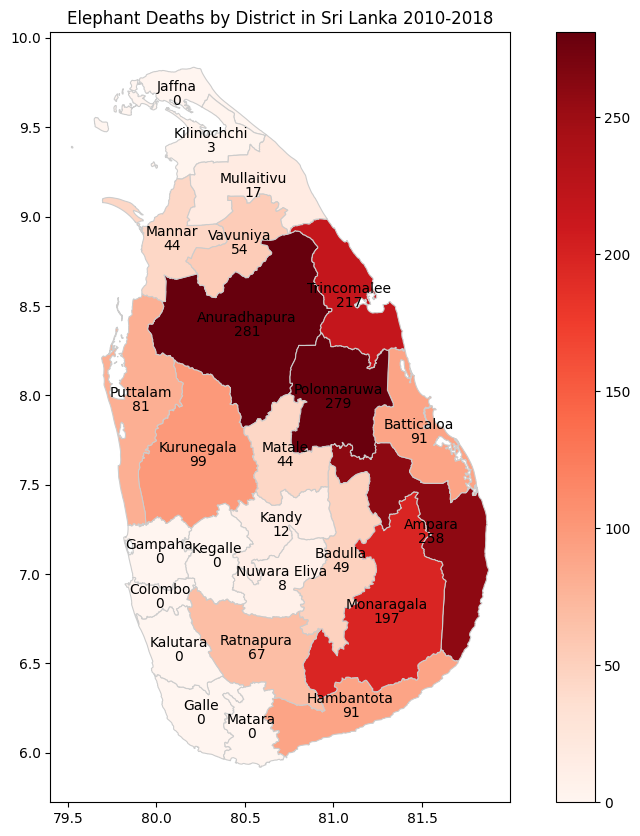

In [77]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map 
merged_data.plot(column='ElephantDeaths', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

# Add district names as labels with an offset above the district boundary
merged_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)

# Add the number of deaths as labels with an offset below the district boundary
merged_data.apply(lambda x: ax.annotate(text=str(int(x['ElephantDeaths'])), xy=x.geometry.centroid.coords[0], ha='center', va='top'), axis=1)

# Add a title
plt.title('Elephant Deaths by District in Sri Lanka 2010-2018')

# Show the map
plt.show()

In [75]:
from ipywidgets import interact, widgets
from IPython.display import display, clear_output



# Function to update the map based on the selected year
def update_map(year):
    # Clear the previous output
    clear_output(wait=True)
    
    # Load your elephant deaths data for the selected year
    data_path = f'D:/UOP/4th year/Research/EDA/Data/{year}_clean.csv'
    df = pd.read_csv(data_path)

    # Group by 'District' and count the number of elephant deaths in each district
    elephant_deaths_by_district = df['District'].value_counts().reset_index()
    elephant_deaths_by_district.columns = ['District', 'ElephantDeaths']

    # Merge the data with district boundaries data
    merged_data = districts.merge(elephant_deaths_by_district, on='District', how='left')

    # Fill NaN values with 0 for districts with no recorded elephant deaths
    merged_data['ElephantDeaths'].fillna(0, inplace=True)

    # Set up the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))

    # Plot the map 
    merged_data.plot(column='ElephantDeaths', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

    # Add district names as labels with an offset above the district boundary
    merged_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)

    # Add the number of deaths as labels with an offset below the district boundary
    merged_data.apply(lambda x: ax.annotate(text=str(int(x['ElephantDeaths'])), xy=x.geometry.centroid.coords[0], ha='center', va='top'), axis=1)

    # Add a title
    plt.title(f'Elephant Deaths by District in Sri Lanka {year}')

    # Show the map in the notebook
    plt.show()

# Create a slider widget for selecting the year
year_slider = widgets.IntSlider(value=2010, min=2010, max=2017, step=1, description='Year')

# Connect the slider to the update_map function using interact
interact(update_map, year=year_slider)


interactive(children=(IntSlider(value=2010, description='Year', max=2017, min=2010), Output()), _dom_classes=(…

<function __main__.update_map(year)>

# Hypothesis

In [53]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table 
contingency_table = pd.crosstab(df['Region'], df['Cause of Death'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

# Check if the p-value is less than the significance level
if p < alpha:
    print("The differences in causes of death between regions are statistically significant (reject the null hypothesis).")
else:
    print("There is no significant difference in causes of death between regions (fail to reject the null hypothesis).")


Chi-Squared Value: 1140.2666530884303
P-Value: 1.821140302418094e-77
The differences in causes of death between regions are statistically significant (reject the null hypothesis).


Hypothesis 1: Age Category and Cause of Death are related.

+ Null Hypothesis (H0): Age Category and Cause of Death are independent.
+ Alternative Hypothesis (H1): Age Category and Cause of Death are dependent.

In [54]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Age Category'], df['Cause of Death'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: Age Category and Cause of Death are dependent.")
else:
    print("Fail to reject the null hypothesis: Age Category and Cause of Death are independent.")


Chi-Squared Value: 601.7984922681819
P-Value: 1.3498544008303112e-69
Reject the null hypothesis: Age Category and Cause of Death are dependent.


In [55]:
from scipy.stats import kruskal
groups = {}
for cause, group_data in df.groupby('Cause of Death')['Age Category']:
    groups[cause] = group_data

# Perform the Kruskal-Wallis test
_, p_value = kruskal(*groups.values())

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in Age Category among different causes of death.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in Age Category among different causes of death.")

Reject the null hypothesis: There are significant differences in Age Category among different causes of death.
